<a href="https://colab.research.google.com/github/Donguk-Jung/Deep-Learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9E%85%EB%AC%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
- Neuron class 만들기 (p69)

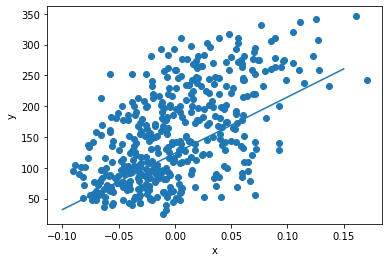

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
#print(diabetes.data.shape, diabetes.target)
x = diabetes.data[:,2]
y = diabetes.target

class Neuron:

# 초기화 작업 및 변수 선언
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

# 정방향 계산 만들기(직선 방정식)
  def forpass(self, x):
    y_hat = x*self.w + self.b
    return y_hat

# 역방향 계산 만들기(가중치와 절편 gradient 계산)
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

# 훈련을 위한 fit() 메서드 구현 
# forpass로 y_hat 구함 -> 오차 구함 -> backprop로 가중치와 절편에 대한 grad 구함 -> 가중치와 절편 update
  def fit(self, x, y, epoch=100):
    for i in range(epoch):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)                  # return 값 y_hat
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i,err)    # return 값 w_grad, b_grad
        self.w -= w_grad
        self.b -= b_grad

# 모델 훈련하기
neuron = Neuron()
neuron.fit(x,y)

# 훈련이 완료된 모델 가중치와 절편 확인하기
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Logistic 회귀(이진 분류)
- 유방암 데이터 세트 활용 (p92)

(569, 30) (569,)


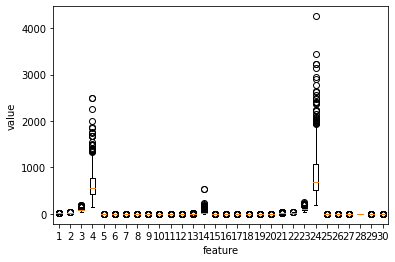

(455, 30) (114, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Data 형태 파악
print(cancer.data.shape,cancer.target.shape)

# boxplot 이용하여 눈에 띄는 특성 찾기(4번, 14번, 24번)
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

# 4,14,24번째 특성의 인덱스를 list로 묶어 전달하여 각 인덱스 특성 확인
cancer.feature_names[[3,13,23]]

# 타겟 데이터 확인 (0,1)의 갯수 파악
# numpy unique 함수 이용하면 고유값 찾아 반환
# 이때 return_counts 매개변수를 True로 지정하면 등장 횟수도 반환
np.unique(cancer.target, return_counts= True)

# 훈련 데이터 세트 저장하기
x = cancer.data
y = cancer.target

# train_test_split()함수로 훈련 데이터 나누기 (훈련 75%, 테스트 25%)
from sklearn.model_selection import train_test_split
# stratify는 훈련 데이터 class 비율을 원 데이터와 동일하게 / test_size는 검증 데이터 비율 조정
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True) # target class 확인 / class 개수 확인

# logistic 회귀 구현
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self,x):
    z = np.sum(x*self.w) + self.b   #직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  # 훈련 메서드 구현 fit()
  def fit(self,x,y,epochs=100):
    self.w = np.ones(x.shape[1])    #가중치 1로 초기화, np.full()이용시, 임의값 가능
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)       # 정방향 계산
        a = self.activation(z)      # 활성화 함수 적용
        err = -(y_i - a)            # 오차 계산
        w_grad, b_grad = self.backprop(x_i,err)    # 역방향 계산
        self.w -= w_grad            # 가중채 update
        self.b -= b_grad            # 절편 update

  # activation 메서드 구현
  def activation(self, z):
    a = 1 / (1+np.exp(-z))
    return a

  # predict() 메서드 구현(예측값은 입력값을 선형함수->활성화함수->임계함수 순으로 통과)
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]      #선형함수 적용
    a = self.activation(np.array(z))          #활성화함수 적용
    return a > 0.5                            #계단함수 적용

# 모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

# 테스트 세트 이용해 모델 정확도 평가
np.mean(neuron.predict(x_test) == y_test)
